In [1]:
import numpy as np
x = 5
y = np.exp(-x)
z = x
z += 3
print(x)

5


In [2]:
class X(object):
    def __init__(self, a):
        self.x = a
        self.y = a

In [3]:
Y = X(1)
print(Y.x)

1


In [4]:
x = np.random.randint(0,10,10)
x = np.reshape(x, [10])
y = np.ones([10,4])
print(x)
print(np.sum(x))
print(y.shape)
print(np.dot(x,y))

[8 3 0 2 1 5 8 8 2 3]
40
(10, 4)
[40. 40. 40. 40.]


In [5]:
print(np.dot(x,y.T))

ValueError: shapes (10,) and (4,10) not aligned: 10 (dim 0) != 4 (dim 0)

In [35]:
from Layer import layer
R, N_clust, nbpola, homeo, algo, krnlinit, output = 2, 4, 2, True, 'mpursuit', 'first', 'me'
L = layer(R, N_clust, nbpola, homeo, algo, krnlinit, output, False)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using downloaded and verified file: ../Data/pips_test.tar.gz
Extracting ../Data/pips_test.tar.gz to ../Data/


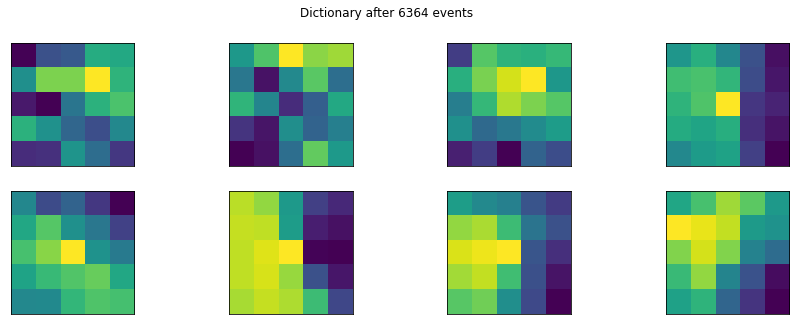

In [39]:
import tonic
from TimeSurface import timesurface

learningset = tonic.datasets.POKERDVS(save_to='../Data/',
                                train=False,
                                transform=None)
loader = tonic.datasets.DataLoader(learningset, shuffle=True)

target_event = 2000
SpTetonic = timesurface(R=2,tau=5e3,camsize=[34,34])
events, target = next(iter(loader))
iev = 0
while iev<target_event:
    x,y,t,p =   int(events[0][iev][learningset.ordering.find("x")].item()), \
                int(events[0][iev][learningset.ordering.find("y")].item()), \
                int(events[0][iev][learningset.ordering.find("t")].item()), \
                int(events[0][iev][learningset.ordering.find("p")].item())
    TS = SpTetonic.addevent(x,y,t,p)
    if len(TS)>0:
        h = L.run(TS, True)
    iev+=1
L.plotdicpola(2,2)

In [61]:
from Network import load
loader, ordering, classes = load('poker', trainset=False, jitonic=[None,None], kfold = 2, kfold_ind = 1)
for events, target in loader:
    print(events.shape)

torch.Size([1, 4239, 4])
torch.Size([1, 3072, 4])
torch.Size([1, 4693, 4])
torch.Size([1, 5366, 4])
torch.Size([1, 2374, 4])
torch.Size([1, 3272, 4])
torch.Size([1, 1077, 4])
torch.Size([1, 3181, 4])
torch.Size([1, 3013, 4])
torch.Size([1, 3585, 4])
torch.Size([1, 2076, 4])
torch.Size([1, 3168, 4])


In [59]:

loader, ordering, classes = self.load(dataset, trainset=train, jitonic=jitonic, subset_size=subset_size)
            nbclass = len(classes)
            homeomod = self.L[0].homeo
            for i in range(len(self.L)):
                self.L[i].homeo=homeotest
            pbar = tqdm(total=nb_digit)
            timout = []
            xout = []
            yout = []
            polout = []
            labout = []
            labelmap = []

            labelmapav = np.zeros([nbclass, len(self.L[-1].cumhisto)])
            labelcount = np.zeros(nbclass)

            x_index = ordering.find("x")
            y_index = ordering.find("y")
            t_index = ordering.find("t")
            p_index = ordering.find("p")

            for events, target in loader:
                for i in range(len(self.L)):
                    self.TS[i].spatpmat[:] = 0
                    self.TS[i].iev = 0
                    self.L[i].cumhisto[:] = 1
                    #self.stats[i].actmap[:] = 0
                pbar.update(1)
                if ds_ev is not None:
                    events = events[:,::ds_ev,:]
                if maxevts is not None:
                    N_max = min(maxevts, events.shape[1])
                else:
                    N_max = events.shape[1]
                if dataset=='cars':
                    size_x = max(events[0,:,ordering.find("x")])-min(events[0,:,ordering.find("x")])
                    size_y = max(events[0,:,ordering.find("y")])-min(events[0,:,ordering.find("y")])
                    self.sensformat((int(size_x.item()),int(size_y.item())))
                    events[0,:,ordering.find("x")] -= min(events[0,:,ordering.find("x")]).numpy()
                    events[0,:,ordering.find("y")] -= min(events[0,:,ordering.find("y")]).numpy()

                for iev in range(N_max):
                    
                    out, activout = self.run(events[0][iev][x_index].item(), \
                                            events[0][iev][y_index].item(), \
                                            events[0][iev][t_index].item(), \
                                            events[0][iev][p_index].item(), \
                                            to_record=to_record)
                    if outstyle=='LR' and activout:
                        xout.append(out[0])
                        yout.append(out[1])
                        timout.append(out[2])
                        polout.append(out[3])
                        labout.append(target.item())

                if train:
                    labelmapav[target.item(),:] += self.L[-1].cumhisto.copy()/np.sum(self.L[-1].cumhisto.copy())
                    labelcount[target.item()] += 1
                    for i in range(len(labelcount)):
                        labelmapav[i,:] /= max(labelcount[i],1)
                data = (target.item(),self.L[-1].cumhisto.copy()/np.sum(self.L[-1].cumhisto.copy()))
                labelmap.append(data)

            for i in range(len(self.L)):
                self.L[i].homeo=homeomod

            pbar.close()

            if train:
                self.save_output(labelmapav, homeotest, dataset, nb=nb_digit, train=train, jitonic=jitonic, outstyle='histav', kfold_ind=kfold_ind)
            self.save_output(labelmap, homeotest, dataset, nb=nb_digit, train=train, jitonic=jitonic, outstyle='histo', kfold_ind=kfold_ind)

            if outstyle=='LR':
                camsize = self.TS[-1].camsize
                nbpola = self.L[-1].kernel.shape[1]
                eventsout = [xout,yout,timout,polout,labout,camsize,nbpola]
                self.save_output(eventsout, homeotest, dataset, nb=nb_digit, train=train, jitonic=jitonic, outstyle='LR', kfold_ind=kfold_ind)
                output = eventsout
            elif outstyle=='histo':
                output = labelmap
            elif outstyle=='histav':
                output = labelmapav
            return output

12


In [75]:
10*40/60

6.666666666666667